In [2]:
import pandas as pd
import networkx as nx

In [3]:
graph_df = pd.read_csv('../public/graph.csv', header=None, sep=';')
graph_df

,0,1,2,3
0,-43.206859,-22.980949,-43.206925,-22.981470
1,-43.206859,-22.980949,-43.206392,-22.980959
2,-43.204756,-22.981045,-43.204708,-22.980168
3,-43.204756,-22.981045,-43.202639,-22.981160
4,-43.202639,-22.981160,-43.202592,-22.980450
...,...,...,...,...
171372,-43.216103,-22.867459,-43.214349,-22.867856
171373,-43.216226,-22.867354,-43.216655,-22.866695
171374,-43.216226,-22.867354,-43.216242,-22.867488
171375,-43.216242,-22.867488,-43.214349,-22.867856


In [4]:
with open('../public/graph.csv') as f:
    lines = f.readlines()

In [5]:
data = [l.strip('\n').split(';') for l in lines]
data1 = []
for i, row in enumerate(data):
    data[i] = [(float(row[0]),float(row[1])),\
               (float(row[2]),float(row[3]))]
    # data1.append([float(i) for i in row])

data

[[(-43.2068586, -22.9809491), (-43.2069254, -22.9814703)],
 [(-43.2068586, -22.9809491), (-43.2063921, -22.9809587)],
 [(-43.2047561, -22.981045), (-43.2047082, -22.9801679)],
 [(-43.2047561, -22.981045), (-43.202639, -22.9811603)],
 [(-43.202639, -22.9811603), (-43.2025921, -22.9804502)],
 [(-43.202639, -22.9811603), (-43.2018481, -22.9811921)],
 [(-43.2005072, -22.9812671), (-43.2004884, -22.980948)],
 [(-43.2005072, -22.9812671), (-43.2005985, -22.9823132)],
 [(-43.2005072, -22.9812671), (-43.1991709, -22.9813286)],
 [(-43.2069254, -22.9814703), (-43.2069634, -22.9819971)],
 [(-43.2069254, -22.9814703), (-43.2047923, -22.981584)],
 [(-43.2047923, -22.981584), (-43.2047561, -22.981045)],
 [(-43.2047923, -22.981584), (-43.2026731, -22.9816651)],
 [(-43.2026731, -22.9816651), (-43.202639, -22.9811603)],
 [(-43.2005985, -22.9823132), (-43.1996049, -22.9823785)],
 [(-43.2005985, -22.9823132), (-43.2027095, -22.982206)],
 [(-43.2005985, -22.9823132), (-43.2006642, -22.9833811)],
 [(-43.20

In [6]:
G = nx.Graph()
G.add_edges_from(data)

---

### Pagerank

In [7]:
pagerank = nx.pagerank(G)

In [8]:
file = open('../public/pagerank.csv', "w")
keys_list = list(pagerank.keys())

for i in pagerank.keys():
    if i == keys_list[-1]:
        file.write(str(i[0])+','+str(i[1])+','+str(pagerank[i]))
    else:
        file.write(str(i[0])+','+str(i[1])+','+str(pagerank[i])+'\n')

file.close()

---

### Degree centrality

In [9]:
degree_centrality = nx.degree_centrality(G)

In [10]:
file = open('../public/degree_centrality.csv', "w")
keys_list = list(degree_centrality.keys())

for i in degree_centrality.keys():
    if i == keys_list[-1]:
        file.write(str(i[0])+','+str(i[1])+','+str(degree_centrality[i]))
    else:
        file.write(str(i[0])+','+str(i[1])+','+str(degree_centrality[i])+'\n')

file.close()

---

### Closeness centrality

In [11]:
G.nodes()

NodeView(((-43.2068586, -22.9809491), (-43.2069254, -22.9814703), (-43.2063921, -22.9809587), (-43.2047561, -22.981045), (-43.2047082, -22.9801679), (-43.202639, -22.9811603), (-43.2025921, -22.9804502), (-43.2018481, -22.9811921), (-43.2005072, -22.9812671), (-43.2004884, -22.980948), (-43.2005985, -22.9823132), (-43.1991709, -22.9813286), (-43.2069634, -22.9819971), (-43.2047923, -22.981584), (-43.2026731, -22.9816651), (-43.1996049, -22.9823785), (-43.2027095, -22.982206), (-43.2006642, -22.9833811), (-43.2069913, -22.9825268), (-43.209065, -22.981876), (-43.2048317, -22.9820994), (-43.2070258, -22.9830556), (-43.2048593, -22.9826381), (-43.2027824, -22.9832869), (-43.2048942, -22.9831704), (-43.2007325, -22.9844518), (-43.2025307, -22.9795532), (-43.2008934, -22.9799521), (-43.2012892, -22.9800821), (-43.1998095, -22.9787595), (-43.2033365, -22.9797922), (-43.2028547, -22.9843556), (-43.2008071, -22.9855586), (-43.1985999, -22.9845781), (-43.1985346, -22.9834925), (-43.1967619, -22

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
file1 = open('../public/regions.geojson')
file2 = open('../public/neighborhoods.geojson')

df_regions = gpd.read_file(file1)
df_neighborhoods = gpd.read_file(file2)

In [14]:
list(G.nodes())[0][0]

-43.2068586

In [15]:
df_neighborhoods.head()

,objectid,área,nome,regiao_adm,area_plane,codbairro,codra,codbnum,link,rp,cod_rp,codbairro_long,st_areashape,st_perimetershape,geometry
0,325,1.705685e+06,Paquetá,PAQUETA,1,013,21,13,Paqueta&area=013 ...,Centro,1.1,13,1.705689e+06,24841.459984,"MULTIPOLYGON (((-43.10571 -22.74889, -43.10572..."
1,326,4.056403e+06,Freguesia (Ilha),ILHA DO GOVERNADOR,3,098,20,98,Freguesia (Ilha) &area=98 ...,Ilha do Governador,3.7,98,4.056414e+06,18303.621385,"MULTIPOLYGON (((-43.17174 -22.77662, -43.17174..."
2,327,9.780465e+05,Bancários,ILHA DO GOVERNADOR,3,097,20,97,Bancários &area=97 ...,Ilha do Governador,3.7,97,9.780492e+05,7758.791895,"MULTIPOLYGON (((-43.18919 -22.78319, -43.18919..."
3,328,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20,104,Galeão &area=104 ...,Ilha do Governador,3.7,104,1.895747e+07,21510.088396,"MULTIPOLYGON (((-43.22808 -22.78375, -43.22816..."
4,329,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20,101,Tauá &area=101 ...,Ilha do Governador,3.7,101,1.672550e+06,8246.120720,"POLYGON ((-43.18044 -22.79941, -43.18026 -22.7..."


In [16]:
from shapely.geometry import Polygon, LineString, Point
pontos = gpd.GeoSeries([Point(i[0], i[1]) for i in list(G.nodes())])

<Axes: >

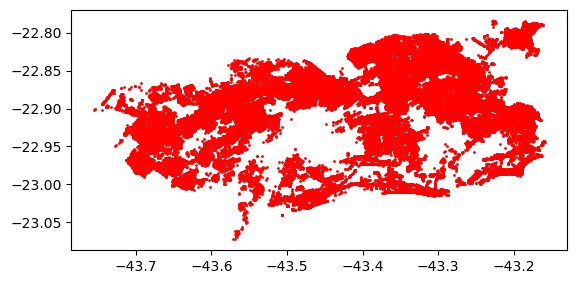

In [17]:
pontos.plot(markersize=1, c='red')

In [18]:
pontos#['codBairro']

0        POINT (-43.20686 -22.98095)
1        POINT (-43.20693 -22.98147)
2        POINT (-43.20639 -22.98096)
3        POINT (-43.20476 -22.98105)
4        POINT (-43.20471 -22.98017)
                    ...             
70978    POINT (-43.27179 -22.89000)
70979    POINT (-43.30102 -22.84157)
70980    POINT (-43.30113 -22.84158)
70981    POINT (-43.21357 -22.92667)
70982    POINT (-43.23692 -22.86294)
Length: 70983, dtype: geometry

In [23]:
pontos.shape[0]

70983

In [26]:
from tqdm import tqdm

pontos_zoados = []
for i in tqdm(range(pontos.shape[0])):
    if df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[i])].shape[0] == 0:
        pontos_zoados.append(pontos[i])

100%|██████████| 70983/70983 [01:27<00:00, 811.19it/s] 


In [36]:
pontos_zoados = gpd.GeoSeries(pontos_zoados)
pontos_zoados

0     POINT (-43.28886 -22.80843)
1     POINT (-43.28861 -22.80795)
2     POINT (-43.28384 -22.80770)
3     POINT (-43.28831 -22.81034)
4     POINT (-43.28851 -22.80951)
5     POINT (-43.28773 -22.80874)
6     POINT (-43.28664 -22.80806)
7     POINT (-43.17455 -22.82019)
8     POINT (-43.36146 -22.80431)
9     POINT (-43.18897 -22.79382)
10    POINT (-43.18927 -22.79543)
11    POINT (-43.25216 -22.83760)
12    POINT (-43.68896 -22.99060)
dtype: geometry

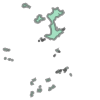

In [41]:
df_neighborhoods['geometry'][0]

In [37]:
df_neighborhoods[df_neighborhoods['geometry'].contains(pontos_zoados[0])]

,objectid,área,nome,regiao_adm,area_plane,codbairro,codra,codbnum,link,rp,cod_rp,codbairro_long,st_areashape,st_perimetershape,geometry


<Axes: >

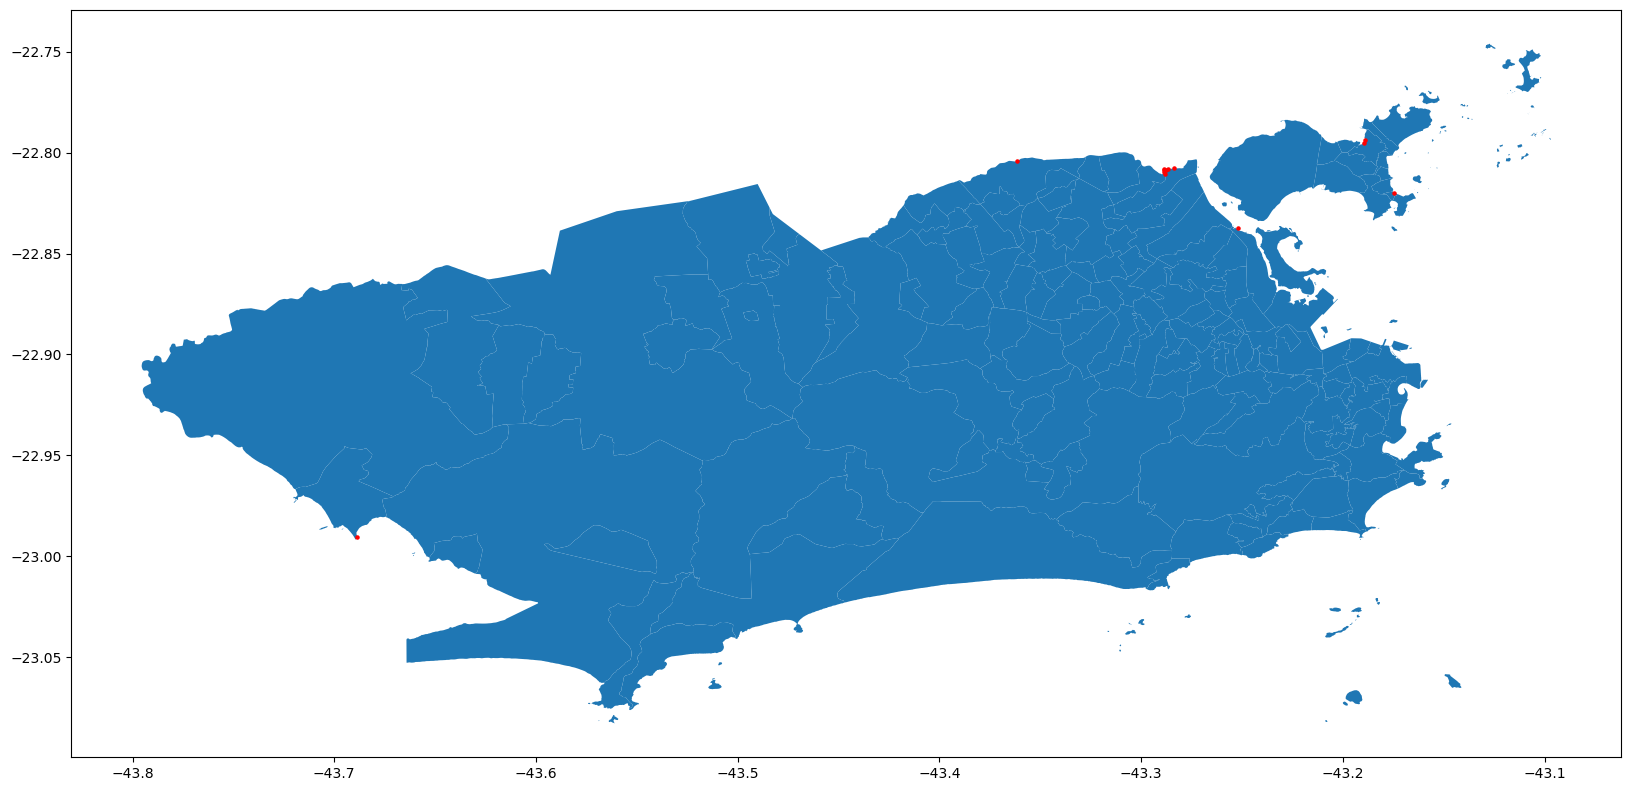

In [35]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_neighborhoods['geometry'].plot(ax=ax)
# df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[150])]['geometry'].plot(ax=ax, color='yellow')
pontos_zoados.plot(markersize=5, c='red', ax=ax)
# ax.scatter(list(G.nodes())[150][0], list(G.nodes())[150][1], c='red',s=5)
# pontos_zoados.explore()

In [139]:
from tqdm import tqdm

lista_bairros = []
for ponto in tqdm(pontos):
    lista_bairros.append(df_neighborhoods[df_neighborhoods['geometry'].contains(ponto)]['codbairro'].values)

100%|██████████| 70983/70983 [01:23<00:00, 846.42it/s]


In [165]:
pontos_df = gpd.GeoDataFrame(pontos)
pontos_df.columns = ['coord']
pontos_df

,coord
0,POINT (-43.20686 -22.98095)
1,POINT (-43.20693 -22.98147)
2,POINT (-43.20639 -22.98096)
3,POINT (-43.20476 -22.98105)
4,POINT (-43.20471 -22.98017)
...,...
70978,POINT (-43.27179 -22.89000)
70979,POINT (-43.30102 -22.84157)
70980,POINT (-43.30113 -22.84158)
70981,POINT (-43.21357 -22.92667)


In [170]:
pontos_df

,coord,codbairro
0,POINT (-43.20686 -22.98095),nan
1,POINT (-43.20693 -22.98147),nan
2,POINT (-43.20639 -22.98096),nan
3,POINT (-43.20476 -22.98105),nan
4,POINT (-43.20471 -22.98017),nan
...,...,...
70978,POINT (-43.27179 -22.89000),nan
70979,POINT (-43.30102 -22.84157),nan
70980,POINT (-43.30113 -22.84158),nan
70981,POINT (-43.21357 -22.92667),nan


In [169]:
pontos_df['codbairro'] = 'nan'
i = 0
for ponto in tqdm(pontos):
    pontos_df['codbairro'][i] = df_neighborhoods[df_neighborhoods['geometry'].contains(ponto)]['codbairro'].values
    i += 1

  0%|          | 0/70983 [00:00<?, ?it/s]


ValueError: Length of values (1) does not match length of index (70983)

In [137]:
import pandas as pd
lista_bairros[0].values[0]

'025'

In [140]:
df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[0])]['codbairro'].values

array(['025'], dtype=object)

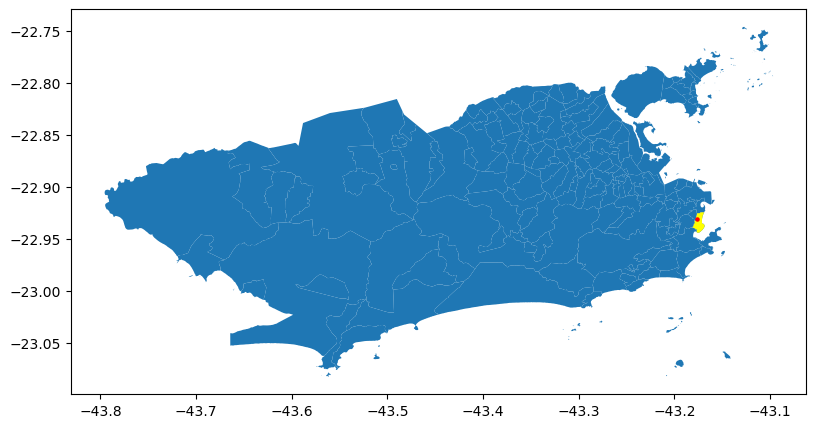

In [117]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df_neighborhoods['geometry'].plot(ax=ax)
df_neighborhoods[df_neighborhoods['geometry'].contains(pontos[150])]['geometry'].plot(ax=ax, color='yellow')
# pontos.plot(markersize=.5, c='red', ax=ax)
ax.scatter(list(G.nodes())[150][0], list(G.nodes())[150][1], c='red',s=5)

---

### Eigenvector centrality

In [60]:
# eigenvec_centrality = nx.eigenvector_centrality(G)